Randomly generate 3-region configurations, with high-res regions 1, 2 and e.

We are trying to determine the convergence factors of region 0.

Things to vary:
* Depth of region 1.
* Depth of region 2.
* Radial width.

Ratios of region 1 depth to region 2 depth and radial width should vary widely.

To ensure good convergence in the other region, keep m0 * h less than 40, and (h-d)/radwidth less than 3 (and greater than 1).

In [1]:
import sys
import os
sys.path.append(os.path.relpath('../../../'))
sys.path.append(os.path.relpath('../../'))

from helpers import *
import numpy as np
from numpy import random

import matplotlib.pyplot as plt

In [2]:
# Functions used to generate random variables for configurations.
def random_d_a(h, taller):
  d = []
  a = []
  rad_widths = []

  h_minus_d_over_radwidths = [random.uniform(low = 1., high = 200.),
                              random.uniform(low = 1., high = 3.),
                              random.uniform(low = 1., high = 3.)]
  if taller:
    hmd1 = 0
    while hmd1 < 1:
      hmd0_to_hmd1 = random.uniform(low = 1., high = 20.)
      hmd0 = random.uniform(low = 1., high = h - 0.5)
      hmd1 = hmd0 / hmd0_to_hmd1
  else:
    hmd0 = 0
    while hmd0 < 1:
      hmd0_to_hmd1 = 1 / random.uniform(low = 1., high = 20.)
      hmd1 = random.uniform(low = 1., high = h - 0.5)
      hmd0 = hmd1 * hmd0_to_hmd1
  hmds = [hmd0, hmd1, random.uniform(low = 2., high = h - 2)]

  for i in range(3):
    di = h - hmds[i]
    rad_width_i = (h - di) / h_minus_d_over_radwidths[i]
    d.append(di)
    rad_widths.append(rad_width_i)
    a.append(sum(rad_widths))

  return d, a

def random_m0(h):
  # need m0 * h < 40
  return random.uniform(low=0.0, high=(40/h))

In [3]:
# Code used to generate raw data.
file1 = "random_innermost.pkl"

hs = np.linspace(5, 50, 10)
big_nmk = 200
nmk_max = 150
NMK = [big_nmk] * 4
heaving = [1, 0, 0]
rho = 1023

# def swap_vals(prob, d, a):
#   # Avoids mk recomputations.
#   prob.d = d
#   prob.a = a
#   prob.scale = a
#   return prob

# all_prob_dicts = []
# for h in hs:
#   m0 = random_m0(h)
#   prob = ConvergenceProblemI(h, [1,1,1], [1,2,3], heaving, NMK, m0, rho)
#   mk = prob.m_k
#   for i in range(40):
#     taller = (i >= 10)
#     d, a = random_d_a(h, taller)
#     info = {"h" : h,
#             "d" : d,
#             "a" : a,
#             "region" : 0,
#             "m0s" : [m0]}
#     swap_vals(prob, d, a)
#     print(info)
#     data_dict = merge_dicts(info, prob.convergence_study_over_m0s(nmk_max, [m0], [mk]))
#     all_prob_dicts.append(data_dict)
#   update_data_file(all_prob_dicts, file1)
#   print("Finished an h.")

In [4]:
# Extract data and add convergence metrics to the dictionaries
all_prob_dicts = open_pkl_file(file1)
generate_convergence_data(all_prob_dicts, [0.01, 0.005])
log_data = generate_log_data(all_prob_dicts)

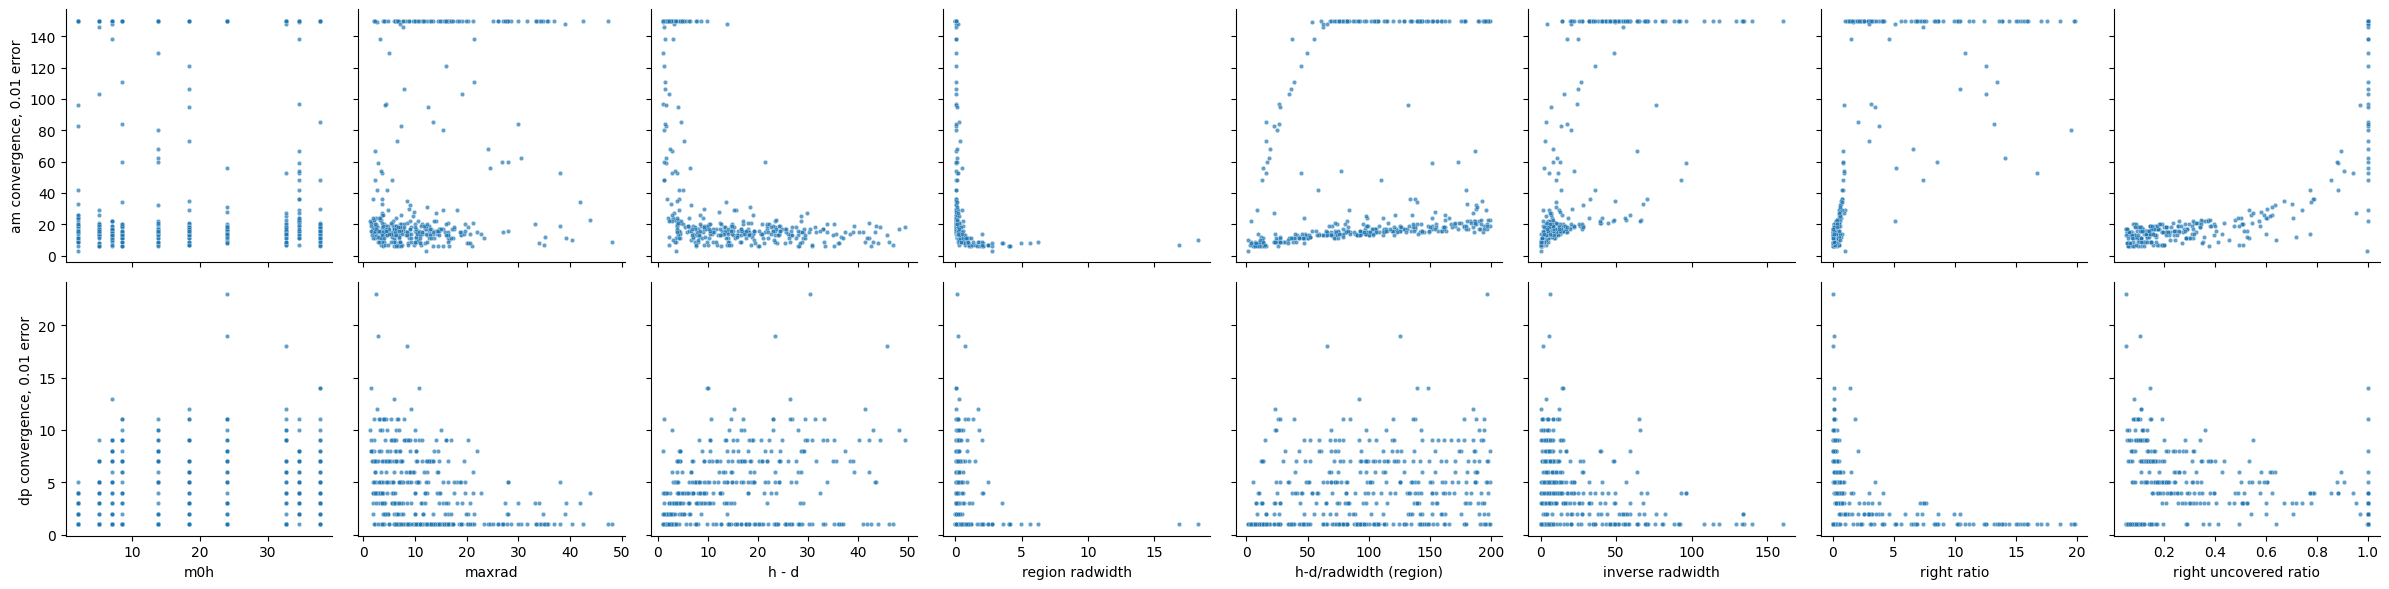

In [5]:
# Plot convergence point on y, m0, h, and m0h on x.
def xf1(config, m0):
  return config["h"]

def xf2(config, m0):
  return m0

def xf3(config, m0):
  return m0 * config["h"]

def xf4(config, m0):
  return (config["a"][-1])

def xf5(config, m0):
  return (config["h"] - config["d"][config["region"]])

def xf6(config, m0):
  region = config["region"]
  if region == 0:
    return config["a"][region]
  else:
    return config["a"][region] - config["a"][region - 1]
  
def xf7(config, m0):
  return config["a"][-1] - config["a"][-2]

def xf8(config, m0):
  radwidth = xf6(config, m0)
  return (config["h"] - config["d"][config["region"]])/radwidth

def xf9(config, m0):
  radwidth = xf7(config, m0)
  return (config["h"] - config["d"][-1])/radwidth

def xf10(config, m0):
  return (config["h"] - config["d"][-1])/(config["h"])

def xf11(config, m0):
  return (config["h"] - config["d"][-1]) * m0

def xf12(config, m0):
  radwidth = xf6(config, m0)
  return 1/radwidth

def xf13(config, m0):
  return 1/((config["h"] - config["d"][config["region"]])/(config["h"] - config["d"][config["region"] + 1]))

def xf14(config, m0):
  region = config["region"]
  right_fluid_height = config["h"] if region == 2 else (config["h"] - config["d"][region + 1])
  self_fluid_height = (config["h"] - config["d"][region])
  if right_fluid_height < self_fluid_height:
    return right_fluid_height/self_fluid_height
  else:
    return 1

def yf1(config, m0):
  return config[m0]["convergence point 0.01 am"]

def yf2(config, m0):
  return config[m0]["convergence point 0.005 am"]

def yf3(config, m0):
  return config[m0]["convergence point 0.01 dp"]

def yf4(config, m0):
  return config[m0]["convergence point 0.005 dp"]

x_funcs = {# "h" : xf1,
           # "m0" : xf2,
           "m0h" : xf3,
           "maxrad" : xf4,
           "h - d" : xf5,
           "region radwidth" : xf6,
           # "outermost radwidth" : xf7,
           "h-d/radwidth (region)" : xf8,
           # "h-d/radwidth (outermost)" : xf9,
           # "h-d/h (outermost)" : xf10,
           # "m0 * (h-d) (outermost)" : xf11,
           "inverse radwidth" : xf12,
           "right ratio" : xf13,
           "right uncovered ratio" : xf14}
y_funcs = {"am convergence, 0.01 error" : yf1,
          #  "am convergence, 0.005 error" : yf2,
           "dp convergence, 0.01 error" : yf3,
          #  "dp convergence, 0.005 error" : yf4
           }

plot_relation_grid(all_prob_dicts, x_funcs, y_funcs)

In [9]:
# variable metrics
def h_minus_d_over_radwidth(data_dict):
    region = data_dict["region"]
    radwidth = data_dict["a"][0] if region == 0 else (data_dict["a"][region] - data_dict["a"][region - 1])
    return (data_dict["h"] - data_dict["d"][region])/radwidth

def tall_theta(data_dict):
  hmdr = h_minus_d_over_radwidth(data_dict)
  return np.arctan(1/hmdr)

def right_ratio(data_dict):
    return (data_dict["h"] - data_dict["d"][data_dict["region"]])/(data_dict["h"] - data_dict["d"][data_dict["region"] + 1])
    
def right_uncovered_ratio(data_dict, over = True): # Fraction of right boundary with imperfect BC
    region = data_dict["region"]
    right_fluid_height = data_dict["h"] if region == 2 else (data_dict["h"] - data_dict["d"][region + 1])
    self_fluid_height = (data_dict["h"] - data_dict["d"][region])
    if (right_fluid_height < self_fluid_height) or over:
      return right_fluid_height/self_fluid_height
    else:
      return 1
    
def radial_dist_to_e(data_dict):
   region = data_dict["region"]
   return data_dict["a"][-1] - data_dict["a"][region]

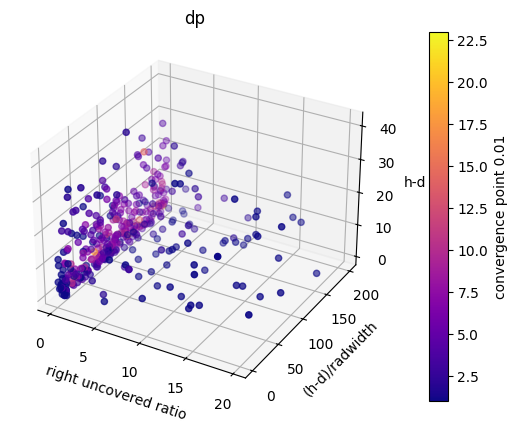

In [ ]:
# plot_hydros_against_3(all_prob_dicts, "am", 0.01,
#                       lambda prob, m0 : prob["h"] - prob["d"][0],
#                       lambda prob, m0 : prob["h"] - prob["d"][1],
#                       lambda prob, m0 : prob["a"][0],
#                       "h-d (self)", "h-d (right)", "radwidth")

# plot_hydros_against_3(all_prob_dicts, "dp", 0.01,
#                       wrap_m0(right_uncovered_ratio),
#                       wrap_m0(h_minus_d_over_radwidth),
#                       lambda data_dict, m0 : (m0 * radial_dist_to_e(data_dict)),
#                       "right uncovered ratio", "(h-d)/radwidth", "h-d")


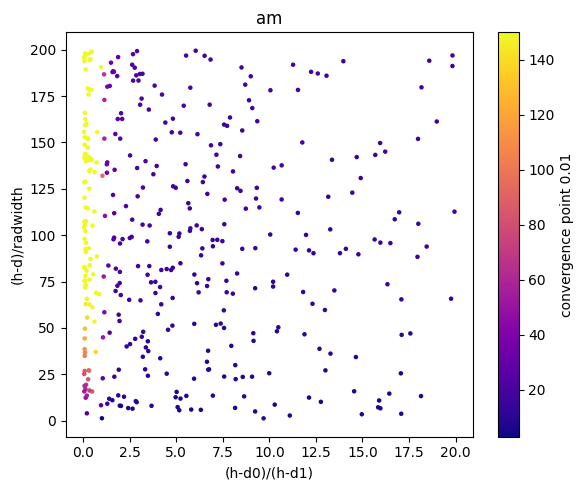

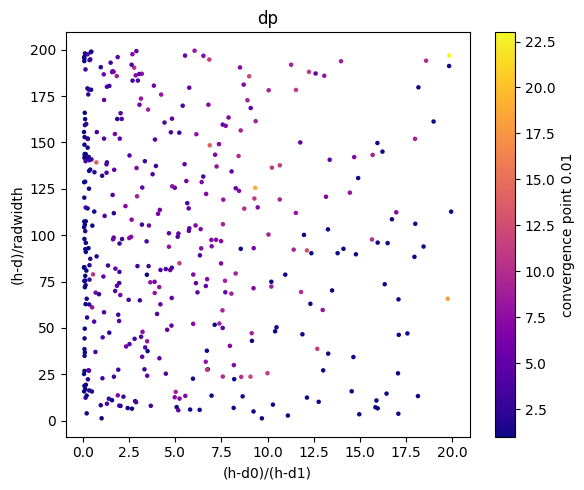

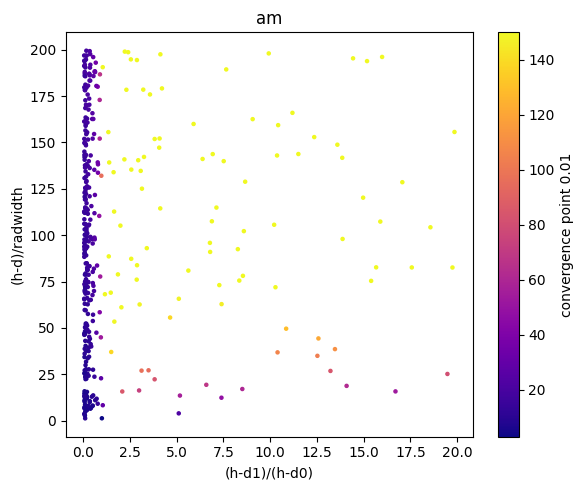

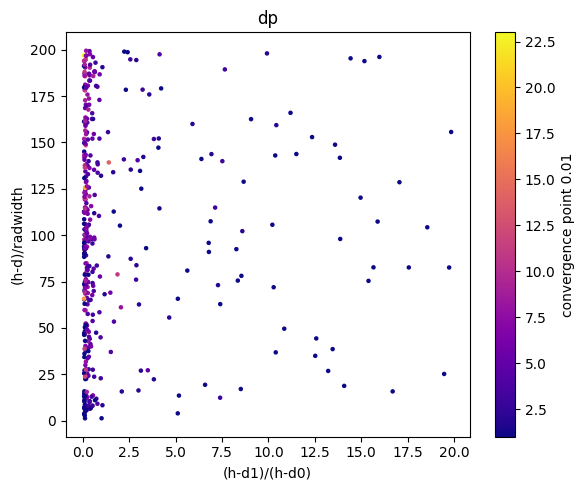

In [8]:
plot_hydros_against_2(all_prob_dicts, "am", 0.01,
                      lambda data_dict, m0 : right_ratio(data_dict),
                      lambda data_dict, m0 : h_minus_d_over_radwidth(data_dict),
                      "(h-d0)/(h-d1)", "(h-d)/radwidth")
plot_hydros_against_2(all_prob_dicts, "dp", 0.01,
                      lambda data_dict, m0 : right_ratio(data_dict),
                      lambda data_dict, m0 : h_minus_d_over_radwidth(data_dict),
                      "(h-d0)/(h-d1)", "(h-d)/radwidth")
plot_hydros_against_2(all_prob_dicts, "am", 0.01,
                      lambda data_dict, m0 : right_uncovered_ratio(data_dict),
                      lambda data_dict, m0 : h_minus_d_over_radwidth(data_dict),
                      "(h-d1)/(h-d0)", "(h-d)/radwidth")
plot_hydros_against_2(all_prob_dicts, "dp", 0.01,
                      lambda data_dict, m0 : right_uncovered_ratio(data_dict),
                      lambda data_dict, m0 : h_minus_d_over_radwidth(data_dict),
                      "(h-d1)/(h-d0)", "(h-d)/radwidth")

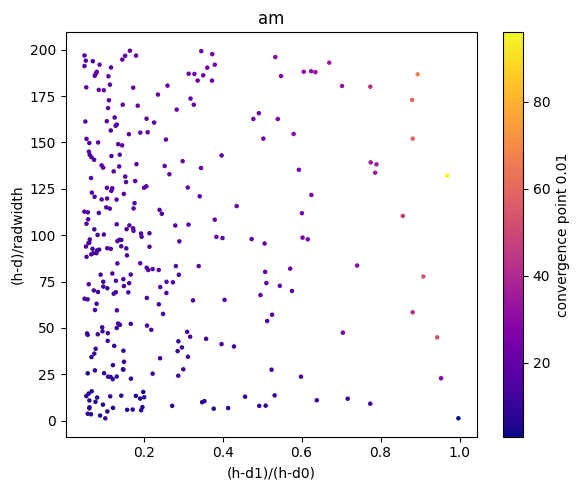

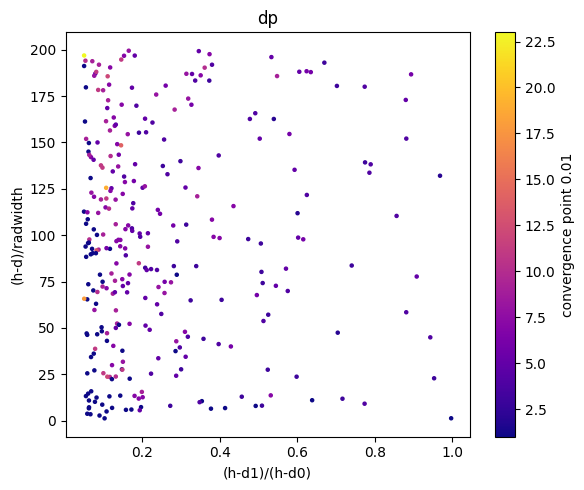

In [9]:
subset = [prob for prob in all_prob_dicts if right_uncovered_ratio(prob) < 1]
# plot_hydros_against_2(subset, "am", 0.01,
#                       lambda data_dict, m0 : right_ratio(data_dict),
#                       lambda data_dict, m0 : h_minus_d_over_radwidth(data_dict),
#                       "right ratio", "(h-d)/radwidth")
# plot_hydros_against_2(subset, "dp", 0.01,
#                       lambda data_dict, m0 : right_ratio(data_dict),
#                       lambda data_dict, m0 : h_minus_d_over_radwidth(data_dict),
#                       "right ratio", "(h-d)/radwidth")
plot_hydros_against_2(subset, "am", 0.01,
                      lambda data_dict, m0 : right_uncovered_ratio(data_dict),
                      lambda data_dict, m0 : h_minus_d_over_radwidth(data_dict),
                      "(h-d1)/(h-d0)", "(h-d)/radwidth")
plot_hydros_against_2(subset, "dp", 0.01,
                      lambda data_dict, m0 : right_uncovered_ratio(data_dict),
                      lambda data_dict, m0 : h_minus_d_over_radwidth(data_dict),
                      "(h-d1)/(h-d0)", "(h-d)/radwidth")

In [10]:
def cf1(data_dict, m0):
   return get_plasma_color(data_dict[m0]["convergence point 0.01 dp"], max_value = 150)

def cf2(data_dict, m0):
   return get_plasma_color(data_dict[m0]["convergence point 0.01 am"], max_value = 150)

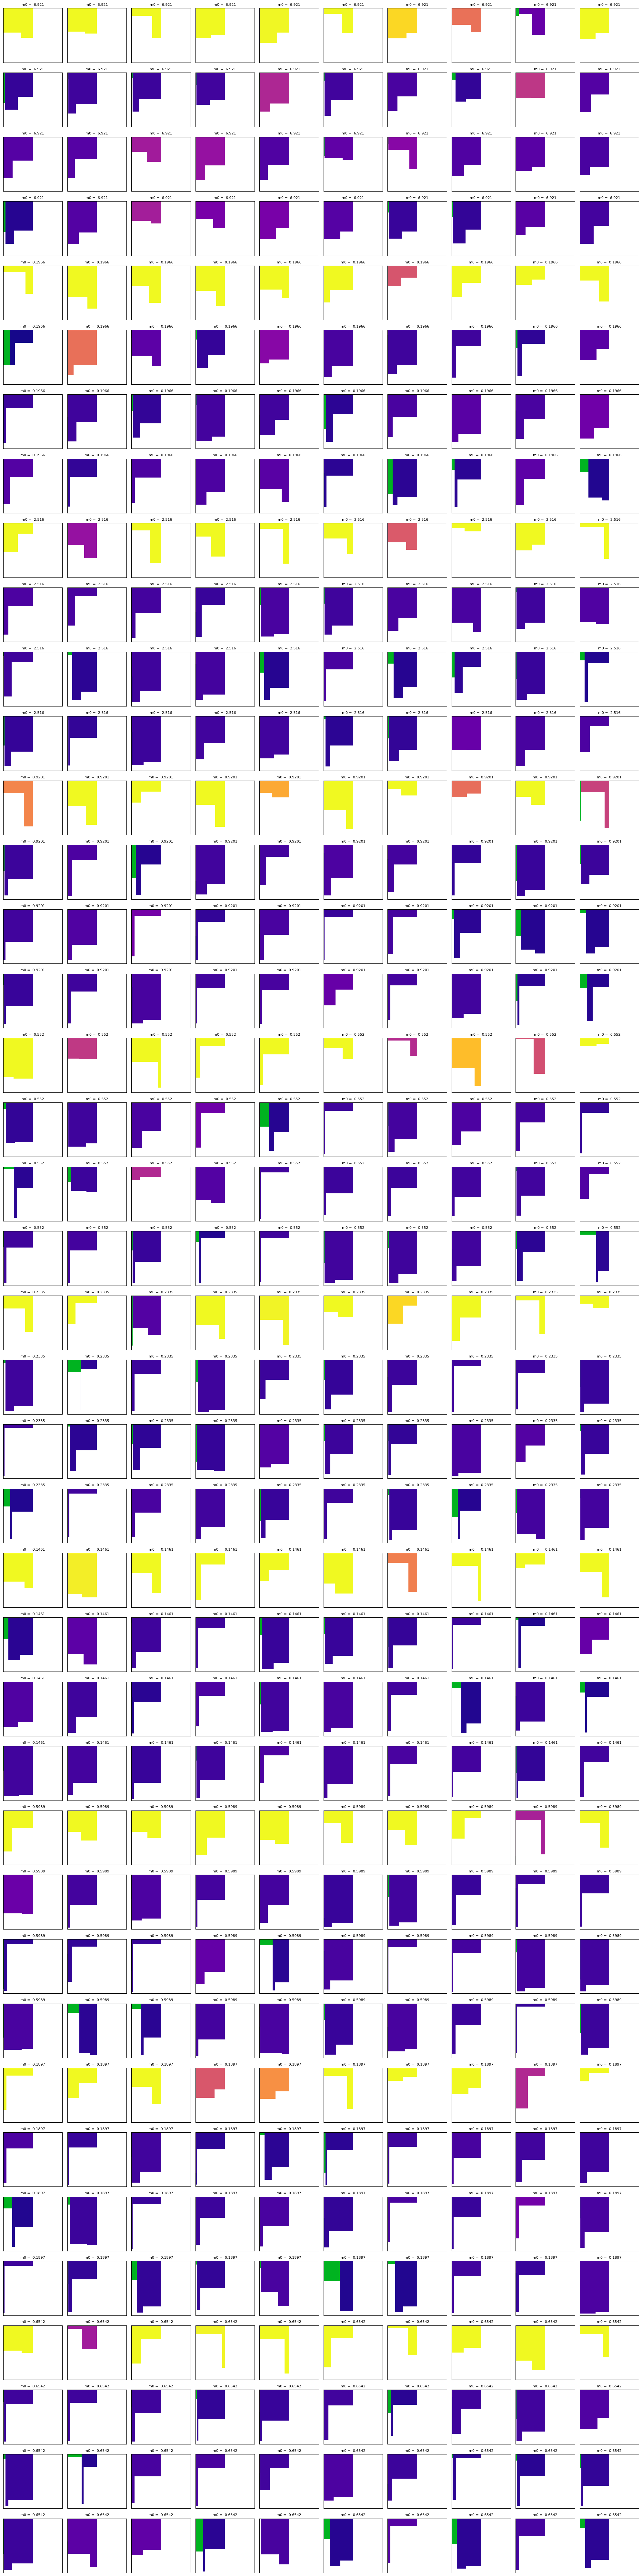

In [11]:
filter_and_plot_shapes(all_prob_dicts, lambda a, b: True, cf2, ppr = 10, figsize_per_plot= (2, 2))

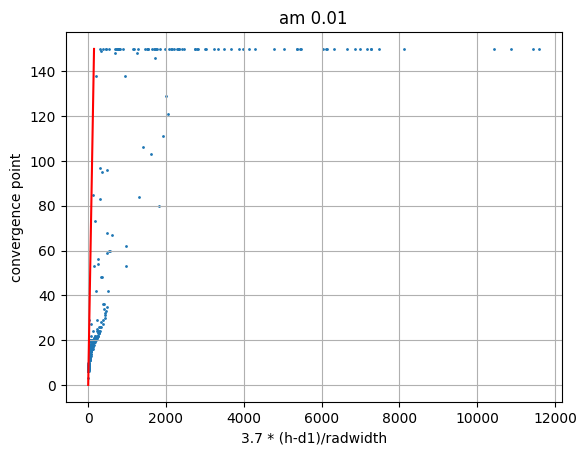

In [12]:
# def dp_prediction1(data_dict, m0):
#   f1 = 6
#   t1 = m0 * (data_dict["h"] - data_dict["d"][data_dict["region"]])
#   f2 = 0.2
#   t2 = h_minus_d_over_radwidth(data_dict)
#   return f1 * t1 * (t2 ** f2) # * t3

def am_prediction1(data_dict, m0):
  t1 = right_uncovered_ratio(data_dict)
  t2 = h_minus_d_over_radwidth(data_dict)
  return ((3.7 * t1 * t2))

plot_hypothesis(all_prob_dicts, "am", 0.01, am_prediction1, "3.7 * (h-d1)/radwidth")